In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from TCC import model_util
from TCC.models.unet import build
from TCC.models.unet_v2 import unet_v2_get_model
from model_util import load_all_imgs
from model_util import model_path

In [19]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)


Num GPUs Available 1


In [20]:
kernel_size=(3, 3)
padding="same"
strides=1
image_size = (320, 320)
epochs = 20
batch_size= 4
num_classes = 3
validation_split= 0.2
f = [16, 32, 64, 128, 256]

metric_name = "binary_acc"
metric = tf.keras.metrics.BinaryAccuracy(name=metric_name, threshold=0.5)

base_output_path = '..\\imagens_cra\\result\\unet_multiclass_epoch_'+str(epochs)+'_size_'+str(image_size)
x_dir = "../imagens_cra/train/cra"
y_dir = "../imagens_cra/validation_interna_externa_v2/cra"


In [21]:
# Load images
trainImgs = load_all_imgs(x_dir,image_size, 1)

y_imgs = load_all_imgs(y_dir,image_size, 0)
y_imgs = y_imgs * 255.0


validImgs = np.zeros(y_imgs.shape + (3, ) )

validImgs[y_imgs == 0] = np.array([1, 0, 0])
validImgs[y_imgs == 1] = np.array([0, 1, 0])
validImgs[y_imgs == 2] = np.array([0, 0, 1])


../imagens_cra/train/cra found 659 img to load

[0]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[100]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[200]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[300]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[400]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[500]:|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[600]:||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
../imagens_cra/validation_interna_externa_v2/cra found 659 img to load

[0]:||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

KeyboardInterrupt: 

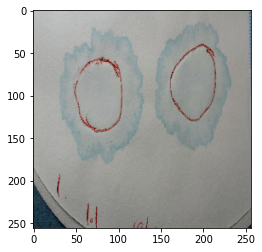

In [5]:
plt.imshow(trainImgs[0])

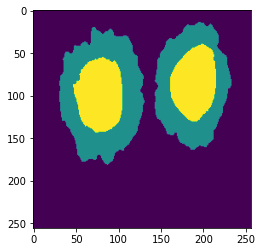

In [6]:
plt.imshow(y_imgs[0])

In [17]:
model = unet_v2_get_model(image_size, 3)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=metric)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 100, 100, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 100, 32) 128         conv2d_19[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 100, 100, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [13]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(model_path(base_output_path), save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
model.fit(trainImgs, validImgs,
          epochs=epochs, callbacks=callbacks,
          validation_split=validation_split, batch_size=batch_size
)

Epoch 1/20


ResourceExhaustedError:  OOM when allocating tensor with shape[64,64,3,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv2d_15/Relu (defined at <ipython-input-8-bbec87398835>:6) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_2869]

Function call stack:
train_function



[0]:||||
Write metrics to: ..\imagens_cra\result\unet_multiclass_epoch_100_size_(128, 128)\metrics.csv


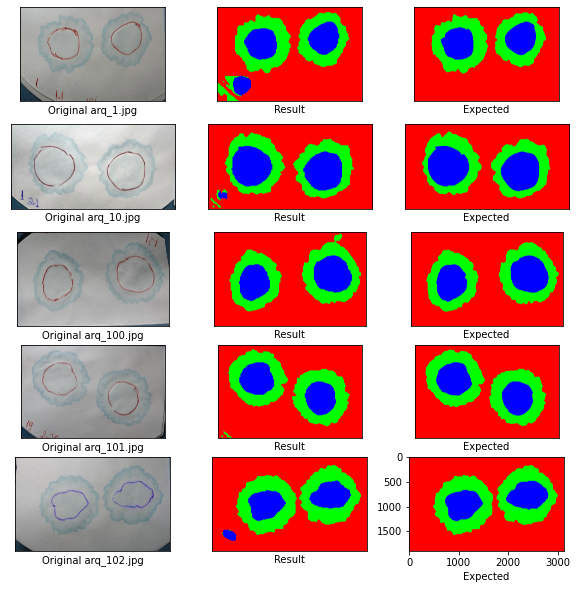

In [26]:
imgTester_metrics = [
    metric,
]

imgUtil = model_util.ImgTesterV2(x_dir, y_dir, base_output_path, image_size, imgTester_metrics)

model_util.test_v2(base_output_path, imgUtil, 5, 5)